In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## Train and test has to be different as it may lead to data lekage


train_df = pd.read_excel('Flight_Price_Data_Train.xlsx')
train_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

### Feature Engineering

In [5]:
train_df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [6]:
## Extract date, month of journey from Date_of_journey



train_df['Journey_day'] = pd.to_datetime(train_df['Date_of_Journey'],format="%d/%m/%Y").dt.day
train_df['Journey_month'] = pd.to_datetime(train_df['Date_of_Journey'],format="%d/%m/%Y").dt.month

In [7]:
train_df.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3


In [8]:
train_df.drop(['Date_of_Journey'],axis=1,inplace=True)

In [9]:
train_df.head(1)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3


In [10]:
## Departure Time( Extracting hrs and mins)



train_df['Dep_hour']= pd.to_datetime(train_df['Dep_Time']).dt.hour
train_df['Dep_min'] = pd.to_datetime(train_df['Dep_Time']).dt.minute

In [11]:
train_df.head(1)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20


In [12]:
train_df.drop(['Dep_Time'],axis=1,inplace=True)

In [13]:
train_df.head(1)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20


In [14]:
##  Arrival time 

train_df['Arrival_hour'] = train_df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[0]
train_df['Arrival_min']= train_df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[1]

In [15]:
train_df.head(1)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,01,10


In [16]:
train_df['Arrival_day'] = train_df['Arrival_Time'].str.split(' ').str[1].str.split(' ').str[0]
train_df['Arrival_month'] = train_df['Arrival_Time'].str.split(' ').str[1].str.split(' ').str[1]

In [17]:
train_df.head(1)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Arrival_day,Arrival_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,01,10,22,NaN


In [18]:
train_df['Arrival_month']=train_df['Journey_month']

In [19]:
train_df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Arrival_day,Arrival_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,01,10,22,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,NaN,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25,04,25,10,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,NaN,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,NaN,3


In [20]:
train_df['Arrival_day'].unique()

array(['22', nan, '10', '13', '02', '04', '28', '19', '07', '16', '25',
       '20', '23', '11', '03', '08', '05', '26', '29', '17'], dtype=object)

In [21]:
train_df['Arrival_day'] =train_df['Arrival_day'].fillna(train_df['Journey_day'])

In [22]:
train_df['Arrival_day'].unique()

array(['22', 1, '10', 12, 24, '13', '02', 27, 18, '04', 15, '28', 6, '19',
       3, '07', '16', 21, 9, '25', '20', '23', '11', '03', '08', '05',
       '26', '29', '17'], dtype=object)

In [23]:
train_df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Arrival_day,Arrival_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,01,10,22,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25,04,25,10,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,1,3


In [24]:
train_df.drop(['Arrival_Time'],axis=1,inplace=True)

In [25]:
train_df.head(1)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Arrival_day,Arrival_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,01,10,22,3


In [26]:
## Duration 


train_df['Duration_hour']=train_df['Duration'].str.split(' ').str[0].str.split('h').str[0]
train_df['Duration_mins'] = train_df['Duration'].str.split(' ').str[1].str.split('m').str[0]

In [27]:
train_df.head(1)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Arrival_day,Arrival_month,Duration_hour,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,01,10,22,3,2,50


In [28]:
train_df.drop(['Duration'],axis=1,inplace=True)

In [29]:
train_df.head(1)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Arrival_day,Arrival_month,Duration_hour,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,01,10,22,3,2,50


In [30]:
train_df['Duration_hour'].unique()

array(['2', '7', '19', '5', '4', '15', '21', '25', '13', '12', '26', '22',
       '23', '20', '10', '6', '11', '8', '16', '3', '27', '1', '14', '9',
       '18', '17', '24', '30', '28', '29', '37', '34', '38', '35', '36',
       '47', '33', '32', '31', '42', '39', '5m', '41', '40'], dtype=object)

In [31]:
train_df[train_df['Duration_hour']=='5m']

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Arrival_day,Arrival_month,Duration_hour,Duration_mins
6474,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,2 stops,No info,17327,6,3,16,50,16,55,6,3,5m,NaN


In [32]:
train_df.drop([6474,2660],axis=0,inplace=True)

In [33]:
train_df['Duration_hour'].unique()

array(['2', '7', '19', '5', '4', '15', '21', '25', '13', '12', '26', '22',
       '23', '20', '10', '6', '11', '8', '16', '3', '27', '1', '14', '9',
       '18', '17', '24', '30', '28', '29', '37', '34', '38', '35', '36',
       '47', '33', '32', '31', '42', '39', '41', '40'], dtype=object)

In [34]:
train_df['Duration_mins'].isnull().sum()

1030

In [35]:
train_df['Duration_mins'] = train_df['Duration_mins'].fillna(0)

In [36]:
train_df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Arrival_day,Arrival_month,Duration_hour,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,01,10,22,3,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,1,5,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,04,25,10,6,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,12,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,1,3,4,45


### Handling categorical Data

OneHotEncoder ---> used when data is not in any order -- Nominal data

LableEncoder ---> Used when the data is in an order eg. one is grater than other -- Ordinal data

In [37]:
#Airlines


train_df['Airline'].value_counts()

Jet Airways                          3848
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

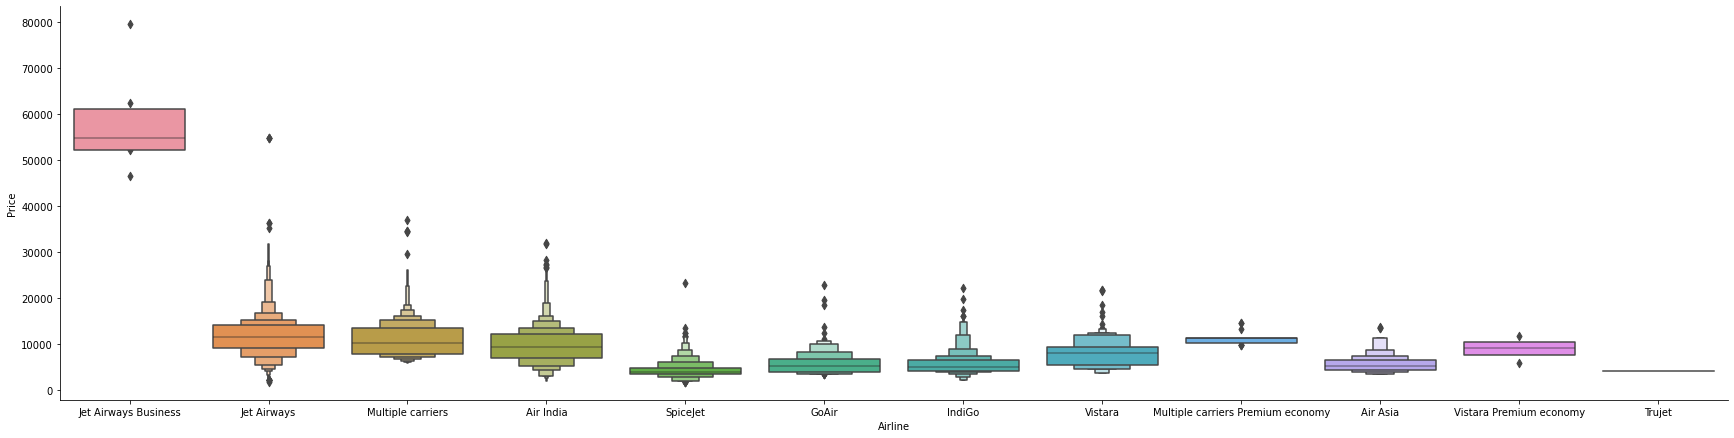

In [38]:
sns.catplot(y='Price',x='Airline',data=train_df.sort_values('Price',ascending=False),kind= 'boxen',height=6,aspect=4)
plt.show()

In [39]:
# As Airline is a Nominal Categorical data we perform OneHotEncoding

Airline = train_df[['Airline']]

Airline = pd.get_dummies(Airline,drop_first=True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [40]:
## Source



train_df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       696
Chennai      381
Name: Source, dtype: int64

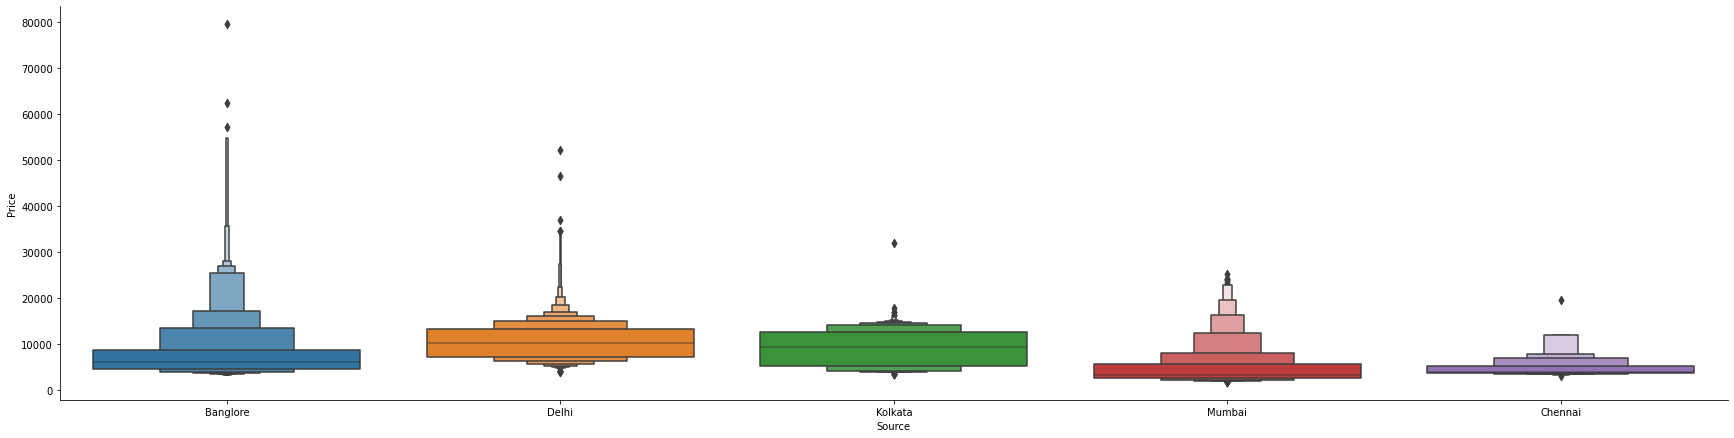

In [42]:
sns.catplot(y='Price',x='Source',data=train_df.sort_values('Price',ascending=False),kind= 'boxen',height=6,aspect=4)
plt.show()

In [43]:
# As Source is a Nominal Categorical data we perform OneHotEncoding

Source = train_df[['Source']]
Source = pd.get_dummies(Source,drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [44]:
## Destination


train_df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     696
Kolkata       381
Name: Destination, dtype: int64

In [45]:
Destination = train_df[['Destination']]
Destination = pd.get_dummies(Destination,drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [46]:
##Route and total stops are related to each other


train_df['Route'].value_counts()

DEL → BOM → COK                2376
BLR → DEL                      1552
CCU → BOM → BLR                 979
CCU → BLR                       724
BOM → HYD                       621
                               ... 
BLR → HBX → BOM → BHO → DEL       1
CCU → IXZ → MAA → BLR             1
BOM → COK → MAA → HYD             1
CCU → IXB → DEL → BLR             1
BOM → BLR → CCU → BBI → HYD       1
Name: Route, Length: 128, dtype: int64

In [47]:
## Additional_Info contains almost 80% no info

train_df['Additional_Info'].value_counts()

No info                         8343
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
2 Long layover                     1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [48]:
## As Route and stops is related and additional_info is not of much help we drop both

train_df.drop(['Additional_Info', 'Route'],axis=1,inplace=True)

In [49]:
train_df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Arrival_day,Arrival_month,Duration_hour,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,01,10,22,3,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,1,5,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,04,25,10,6,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,12,5,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,1,3,4,45


In [50]:
## Total_stops


train_df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1518
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [51]:
# As this is case of Ordinal Category we perform LableEncoder

train_df['Total_Stops']=train_df['Total_Stops'].replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})
train_df

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Arrival_day,Arrival_month,Duration_hour,Duration_mins
0,IndiGo,Banglore,New Delhi,0.0,3897,24,3,22,20,01,10,22,3,2,50
1,Air India,Kolkata,Banglore,2.0,7662,1,5,5,50,13,15,1,5,7,25
2,Jet Airways,Delhi,Cochin,2.0,13882,9,6,9,25,04,25,10,6,19,0
3,IndiGo,Kolkata,Banglore,1.0,6218,12,5,18,5,23,30,12,5,5,25
4,IndiGo,Banglore,New Delhi,1.0,13302,1,3,16,50,21,35,1,3,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0.0,4107,9,4,19,55,22,25,9,4,2,30
10679,Air India,Kolkata,Banglore,0.0,4145,27,4,20,45,23,20,27,4,2,35
10680,Jet Airways,Banglore,Delhi,0.0,7229,27,4,8,20,11,20,27,4,3,0
10681,Vistara,Banglore,New Delhi,0.0,12648,1,3,11,30,14,10,1,3,2,40


In [52]:
## adding all OneHotEncoded data to train_df

train_df = pd.concat([train_df,Airline,Source,Destination],axis=1)

In [53]:
train_df

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0.0,3897,24,3,22,20,01,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2.0,7662,1,5,5,50,13,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2.0,13882,9,6,9,25,04,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1.0,6218,12,5,18,5,23,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1.0,13302,1,3,16,50,21,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0.0,4107,9,4,19,55,22,...,0,0,0,1,0,0,0,0,0,0
10679,Air India,Kolkata,Banglore,0.0,4145,27,4,20,45,23,...,0,0,0,1,0,0,0,0,0,0
10680,Jet Airways,Banglore,Delhi,0.0,7229,27,4,8,20,11,...,0,0,0,0,0,0,1,0,0,0
10681,Vistara,Banglore,New Delhi,0.0,12648,1,3,11,30,14,...,0,0,0,0,0,0,0,0,0,1


In [54]:
train_df.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [55]:
train_df.head(1)

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Arrival_day,Arrival_month,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,3897,24,3,22,20,01,10,22,3,...,0,0,0,0,0,0,0,0,0,1


In [56]:
train_df.dtypes

Total_Stops                                  float64
Price                                          int64
Journey_day                                    int64
Journey_month                                  int64
Dep_hour                                       int64
Dep_min                                        int64
Arrival_hour                                  object
Arrival_min                                   object
Arrival_day                                   object
Arrival_month                                  int64
Duration_hour                                 object
Duration_mins                                 object
Airline_Air India                              uint8
Airline_GoAir                                  uint8
Airline_IndiGo                                 uint8
Airline_Jet Airways                            uint8
Airline_Jet Airways Business                   uint8
Airline_Multiple carriers                      uint8
Airline_Multiple carriers Premium economy     

In [57]:
train_df['Total_Stops'].unique()

array([ 0.,  2.,  1.,  3., nan,  4.])

In [58]:
train_df[train_df['Total_Stops'].isnull()]

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Arrival_day,Arrival_month,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
9039,NaN,7480,6,5,9,45,09,25,07,5,...,0,0,1,0,0,1,0,0,0,0


In [59]:
train_df.drop([9039],axis = 0,inplace = True)

In [60]:
train_df['Duration_mins'] = train_df['Duration_mins'].astype(int)
train_df['Duration_hour'] = train_df['Duration_hour'].astype(int)
train_df['Arrival_hour'] = train_df['Arrival_hour'].astype(int)
train_df['Arrival_min'] = train_df['Arrival_min'].astype(int)
train_df['Arrival_day'] = train_df['Arrival_day'].astype(int)

In [61]:
train_df['Total_Stops'] = train_df['Total_Stops'].astype(int)

In [62]:
train_df.dtypes

Total_Stops                                  int32
Price                                        int64
Journey_day                                  int64
Journey_month                                int64
Dep_hour                                     int64
Dep_min                                      int64
Arrival_hour                                 int32
Arrival_min                                  int32
Arrival_day                                  int32
Arrival_month                                int64
Duration_hour                                int32
Duration_mins                                int32
Airline_Air India                            uint8
Airline_GoAir                                uint8
Airline_IndiGo                               uint8
Airline_Jet Airways                          uint8
Airline_Jet Airways Business                 uint8
Airline_Multiple carriers                    uint8
Airline_Multiple carriers Premium economy    uint8
Airline_SpiceJet               

In [63]:
test_df = pd.read_excel('Flight_Price_Test_set.xlsx')
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [64]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [65]:
test_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [66]:
test_df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info


In [67]:
## Extract date, month of journey from Date_of_journey



test_df['Journey_day'] = pd.to_datetime(test_df['Date_of_Journey'],format="%d/%m/%Y").dt.day
test_df['Journey_month'] = pd.to_datetime(test_df['Date_of_Journey'],format="%d/%m/%Y").dt.month

test_df.drop(['Date_of_Journey'],axis=1,inplace=True)

test_df.head(1)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6


In [68]:
## Departure Time( Extracting hrs and mins)



test_df['Dep_hour']= pd.to_datetime(test_df['Dep_Time']).dt.hour
test_df['Dep_min'] = pd.to_datetime(test_df['Dep_Time']).dt.minute

test_df.drop(['Dep_Time'],axis=1,inplace=True)
test_df.head(1)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Jun,10h 55m,1 stop,No info,6,6,17,30


In [69]:
##  Arrival time 

test_df['Arrival_hour'] = test_df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[0]
test_df['Arrival_min']= test_df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[1]
test_df.head(1)

test_df['Arrival_day'] = test_df['Arrival_Time'].str.split(' ').str[1].str.split(' ').str[0]
test_df['Arrival_month'] = test_df['Arrival_Time'].str.split(' ').str[1].str.split(' ').str[1]

test_df['Arrival_month']=test_df['Journey_month']

test_df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Arrival_day,Arrival_month
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Jun,10h 55m,1 stop,No info,6,6,17,30,04,25,07,6
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,10:20,4h,1 stop,No info,12,5,6,20,10,20,NaN,5
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,19,15,19,00,22,5
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,21:00,13h,1 stop,No info,21,5,8,0,21,00,NaN,5
4,Air Asia,Banglore,Delhi,BLR → DEL,02:45 25 Jun,2h 50m,non-stop,No info,24,6,23,55,02,45,25,6


In [70]:
test_df['Arrival_day'].unique()

array(['07', nan, '22', '25', '13', '04', '10', '16', '28', '02', '19',
       '08', '23', '11', '29', '05', '20'], dtype=object)

In [71]:
test_df['Arrival_day'] =test_df['Arrival_day'].fillna(test_df['Journey_day'])

In [72]:
test_df['Arrival_day'].unique()

array(['07', 12, '22', 21, '25', '13', 1, 15, 18, '04', 6, 24, '10', '16',
       9, '28', '02', 3, 27, '19', '08', '23', '11', '29', '05', '20'],
      dtype=object)

In [73]:
test_df.drop(['Arrival_Time'],axis=1,inplace=True)
test_df.head(1)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Arrival_day,Arrival_month
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,17,30,04,25,07,6


In [74]:
## Duration 


test_df['Duration_hour']=test_df['Duration'].str.split(' ').str[0].str.split('h').str[0]
test_df['Duration_mins'] = test_df['Duration'].str.split(' ').str[1].str.split('m').str[0]
test_df.drop(['Duration'],axis=1,inplace=True)

test_df['Duration_mins'] = test_df['Duration_mins'].fillna(0)
test_df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Arrival_day,Arrival_month,Duration_hour,Duration_mins
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,17,30,04,25,07,6,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,12,5,6,20,10,20,12,5,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,19,15,19,00,22,5,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,21,5,8,0,21,00,21,5,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,24,6,23,55,02,45,25,6,2,50


In [75]:
#Airlines


test_df['Airline'].value_counts()

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64

In [76]:
# As Airline is a Nominal Categorical data we perform OneHotEncoding

Airline = test_df[['Airline']]

Airline = pd.get_dummies(Airline,drop_first=True)

Airline.head()


,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [77]:
test_df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Arrival_day,Arrival_month,Duration_hour,Duration_mins
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,17,30,04,25,07,6,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,12,5,6,20,10,20,12,5,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,19,15,19,00,22,5,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,21,5,8,0,21,00,21,5,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,24,6,23,55,02,45,25,6,2,50


In [78]:
test_df['Source'].value_counts()

Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64

In [79]:
# As Source is a Nominal Categorical data we perform OneHotEncoding

Source = test_df[['Source']]
Source = pd.get_dummies(Source,drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0


In [80]:
## Destination


test_df['Destination'].value_counts()


Destination = test_df[['Destination']]
Destination = pd.get_dummies(Destination,drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0


In [81]:
## As Route and stops is related and additional_info is not of much help we drop both

test_df.drop(['Additional_Info', 'Route'],axis=1,inplace=True)

In [82]:
test_df.head()

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Arrival_day,Arrival_month,Duration_hour,Duration_mins
0,Jet Airways,Delhi,Cochin,1 stop,6,6,17,30,04,25,07,6,10,55
1,IndiGo,Kolkata,Banglore,1 stop,12,5,6,20,10,20,12,5,4,0
2,Jet Airways,Delhi,Cochin,1 stop,21,5,19,15,19,00,22,5,23,45
3,Multiple carriers,Delhi,Cochin,1 stop,21,5,8,0,21,00,21,5,13,0
4,Air Asia,Banglore,Delhi,non-stop,24,6,23,55,02,45,25,6,2,50


In [83]:
test_df['Total_Stops'].unique()

array(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'],
      dtype=object)

In [84]:
# as this is Ordinal Category, we use LabelEncoding

test_df['Total_Stops'] = test_df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})

In [85]:
test_df

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Arrival_day,Arrival_month,Duration_hour,Duration_mins
0,Jet Airways,Delhi,Cochin,1,6,6,17,30,04,25,07,6,10,55
1,IndiGo,Kolkata,Banglore,1,12,5,6,20,10,20,12,5,4,0
2,Jet Airways,Delhi,Cochin,1,21,5,19,15,19,00,22,5,23,45
3,Multiple carriers,Delhi,Cochin,1,21,5,8,0,21,00,21,5,13,0
4,Air Asia,Banglore,Delhi,0,24,6,23,55,02,45,25,6,2,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,1,6,6,20,30,20,25,07,6,23,55
2667,IndiGo,Kolkata,Banglore,0,27,3,14,20,16,55,27,3,2,35
2668,Jet Airways,Delhi,Cochin,1,6,3,21,50,04,25,07,3,6,35
2669,Air India,Delhi,Cochin,1,6,3,4,0,19,15,6,3,15,15


In [86]:
## adding all OneHotEncoded data to train_df

test_df = pd.concat([test_df,Airline,Source,Destination],axis=1)

In [87]:
test_df.head()

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,Jet Airways,Delhi,Cochin,1,6,6,17,30,04,25,...,0,0,1,0,0,1,0,0,0,0
1,IndiGo,Kolkata,Banglore,1,12,5,6,20,10,20,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,1,21,5,19,15,19,00,...,0,0,1,0,0,1,0,0,0,0
3,Multiple carriers,Delhi,Cochin,1,21,5,8,0,21,00,...,0,0,1,0,0,1,0,0,0,0
4,Air Asia,Banglore,Delhi,0,24,6,23,55,02,45,...,0,0,0,0,0,0,1,0,0,0


In [88]:
test_df.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [89]:
test_df

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Arrival_day,Arrival_month,Duration_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,04,25,07,6,10,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,12,5,4,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,00,22,5,23,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,00,21,5,13,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,02,45,25,6,2,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,6,6,20,30,20,25,07,6,23,...,0,0,0,1,0,0,0,0,0,0
2667,0,27,3,14,20,16,55,27,3,2,...,0,0,0,1,0,0,0,0,0,0
2668,1,6,3,21,50,04,25,07,3,6,...,0,0,1,0,0,1,0,0,0,0
2669,1,6,3,4,0,19,15,6,3,15,...,0,0,1,0,0,1,0,0,0,0


In [90]:
test_df.dtypes

Total_Stops                                   int64
Journey_day                                   int64
Journey_month                                 int64
Dep_hour                                      int64
Dep_min                                       int64
Arrival_hour                                 object
Arrival_min                                  object
Arrival_day                                  object
Arrival_month                                 int64
Duration_hour                                object
Duration_mins                                object
Airline_Air India                             uint8
Airline_GoAir                                 uint8
Airline_IndiGo                                uint8
Airline_Jet Airways                           uint8
Airline_Jet Airways Business                  uint8
Airline_Multiple carriers                     uint8
Airline_Multiple carriers Premium economy     uint8
Airline_SpiceJet                              uint8
Airline_Vist

In [91]:
test_df[test_df['Duration_hour']=='5m']

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Arrival_day,Arrival_month,Duration_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
2660,2,12,3,16,50,16,55,12,3,5m,...,0,0,0,0,1,0,0,1,0,0


In [92]:
test_df.drop([2660],axis=0,inplace=True)

In [93]:
test_df[test_df['Duration_hour']=='5m']

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Arrival_day,Arrival_month,Duration_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi


In [94]:
type = ['Duration_mins','Duration_hour','Arrival_day','Arrival_min','Arrival_hour']

for i in type:
    test_df[i] = test_df[i].astype(int)
    

In [95]:
test_df.dtypes

Total_Stops                                  int64
Journey_day                                  int64
Journey_month                                int64
Dep_hour                                     int64
Dep_min                                      int64
Arrival_hour                                 int32
Arrival_min                                  int32
Arrival_day                                  int32
Arrival_month                                int64
Duration_hour                                int32
Duration_mins                                int32
Airline_Air India                            uint8
Airline_GoAir                                uint8
Airline_IndiGo                               uint8
Airline_Jet Airways                          uint8
Airline_Jet Airways Business                 uint8
Airline_Multiple carriers                    uint8
Airline_Multiple carriers Premium economy    uint8
Airline_SpiceJet                             uint8
Airline_Vistara                

### Feature Selection

1. heatmap
2. feature_importance_
3.SelectKBest

In [96]:
train_df.shape

(10680, 32)

In [97]:
train_df.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Arrival_day',
       'Arrival_month', 'Duration_hour', 'Duration_mins', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [98]:
X = train_df.loc[:,['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Arrival_day',
       'Arrival_month', 'Duration_hour', 'Duration_mins', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]

X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Arrival_day,Arrival_month,Duration_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,22,3,2,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,1,5,7,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,10,6,19,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,12,5,5,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,1,3,4,...,0,0,0,0,0,0,0,0,0,1


In [99]:
y = train_df.iloc[:,1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

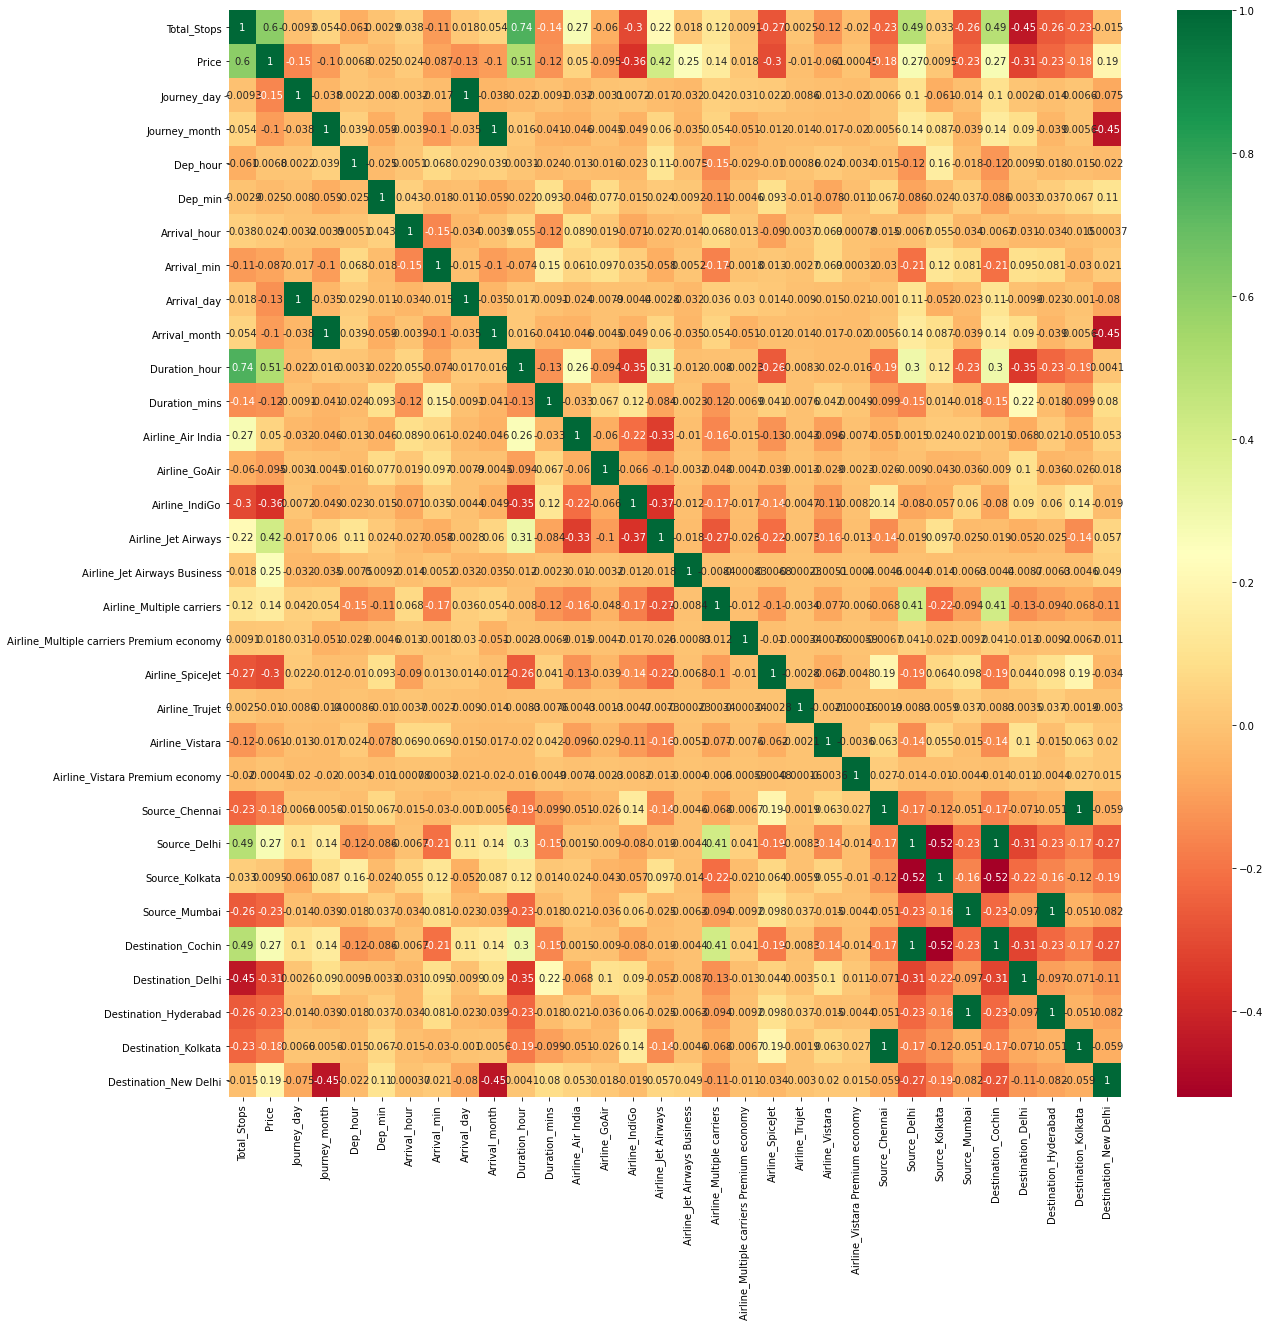

In [100]:
# finding correlation between dependent and independent features

plt.figure(figsize= (20,20))
sns.heatmap(train_df.corr(),annot=True,cmap = 'RdYlGn')

plt.show()

In [101]:
# Important feature using ExtraTreeRegressor


from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

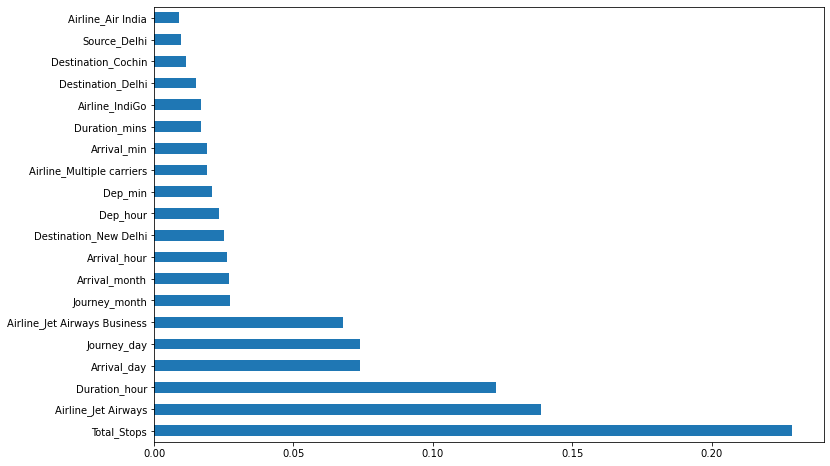

In [102]:
# plot Graph of feature importance for better visualization

plt.figure(figsize=(12,8))
feat_importance = pd.Series(selection.feature_importances_,index=X.columns)
feat_importance.nlargest(20).plot(kind='barh')
plt.show()

# Fitting model using Random Forest
1. Split dataset into train and test set in order to prediction w.r.t X_test
2. If needed do scaling of data
 - Scaling is not done in Random forest
3. Import model
4. Fit the data
5. Predict w.r.t X_test
6. In regression check RSME Score
7. Plot graph

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=43)

In [104]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train,y_train)

RandomForestRegressor()

In [105]:
y_pred = reg_rf.predict(X_test)

In [106]:
reg_rf.score(X_train,y_train)

0.9526673950027734

In [107]:
reg_rf.score(X_test,y_test)

0.831238850876332

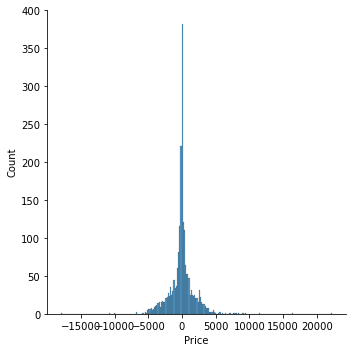

In [108]:
sns.displot(y_test - y_pred)
plt.show()

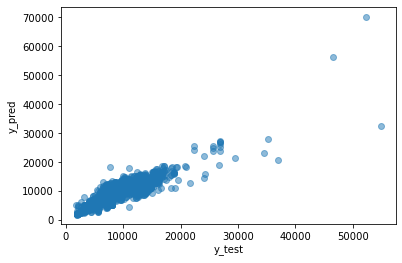

In [109]:
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [110]:
from sklearn import metrics

In [111]:
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 1146.0994750540115
MSE: 3591566.8841087
RMSE: 1895.1429719439902


In [112]:
metrics.r2_score(y_test,y_pred)

0.831238850876332

# Hyperparameter Tuning
Choose following method for hyperparameter tuning
1. RandomizedSearchCV --> Fast
2. GridSearchCV
- Assign hyperparameters in form of dictionery
- Fit the model
- Check best paramters and best score

In [123]:
from sklearn.model_selection import RandomizedSearchCV

In [124]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [125]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [126]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)


In [127]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   5.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   5.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [128]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [129]:
prediction = rf_random.predict(X_test)

C:\Users\Prateek\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


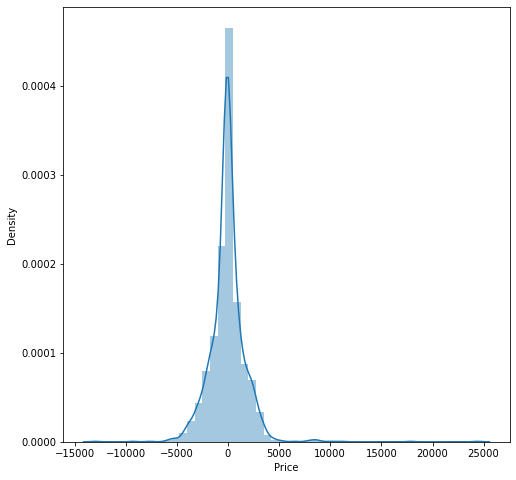

In [130]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

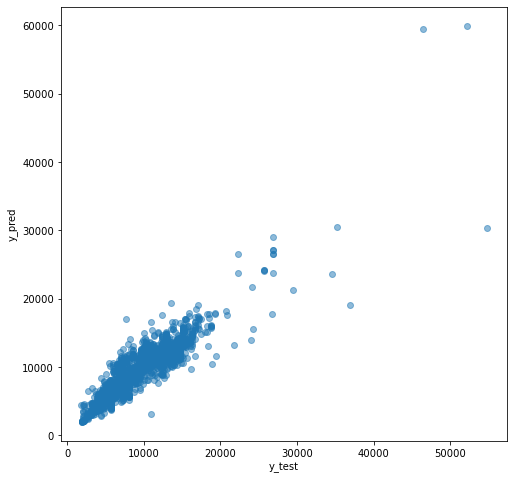

In [131]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [132]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1111.2141463487503
MSE: 3130855.1335740625
RMSE: 1769.422259827784


In [135]:
import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

In [137]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [138]:
y_prediction = forest.predict(X_test)

In [139]:
metrics.r2_score(y_test, y_prediction)

0.8528868521370121